In [2]:
from google.colab import files
uploaded = files.upload()

Saving movie_titles _1_.csv to movie_titles _1_.csv


In [3]:
#Netflix prize dataset
#importing the necessary libraries for importing the dataset in jupyter notebook
#100M ratings 17770 movies 480,000 users 4 datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
# Reading dataset file
netflix_dataset = pd.read_csv('/content/drive/MyDrive/combined_data_1.txt (2).zip',header = None, names = ['Cust_Id', 'Rating'], usecols = [0,1])
netflix_dataset.head()

,Cust_Id,Rating
0,1:,NaN
1,1488844,3.0
2,822109,5.0
3,885013,4.0
4,30878,4.0


In [10]:
netflix_dataset.dtypes

Cust_Id     object
Rating     float64
dtype: object

In [11]:
netflix_dataset

,Cust_Id,Rating
0,1:,NaN
1,1488844,3.0
2,822109,5.0
3,885013,4.0
4,30878,4.0
...,...,...
24058258,2591364,2.0
24058259,1791000,2.0
24058260,512536,5.0
24058261,988963,3.0


In [12]:
netflix_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24058263 entries, 0 to 24058262
Data columns (total 2 columns):
 #   Column   Dtype  
---  ------   -----  
 0   Cust_Id  object 
 1   Rating   float64
dtypes: float64(1), object(1)
memory usage: 367.1+ MB


In [14]:
#To find out how many people have rated the movies as 1, 2, 3,4,5 stars ratings to the movies
stars=netflix_dataset.groupby('Rating')['Rating'].agg(['count'])
stars

,count
Rating,
1.0,1118186
2.0,2439073
3.0,6904181
4.0,8085741
5.0,5506583


In [15]:
#get the customer count with NaN values
movie_count=netflix_dataset.isnull().sum()
movie_count

Cust_Id       0
Rating     4499
dtype: int64

In [16]:
movie_count=netflix_dataset.isnull().sum()[1]
movie_count

4499

In [17]:
#to claculate how many customers we are having in the dataset
customer_count=netflix_dataset['Cust_Id'].nunique()
customer_count

475257

In [18]:
#get the total number of ratings given by the customers
rating_count=netflix_dataset['Cust_Id'].count()-movie_count
rating_count

24053764

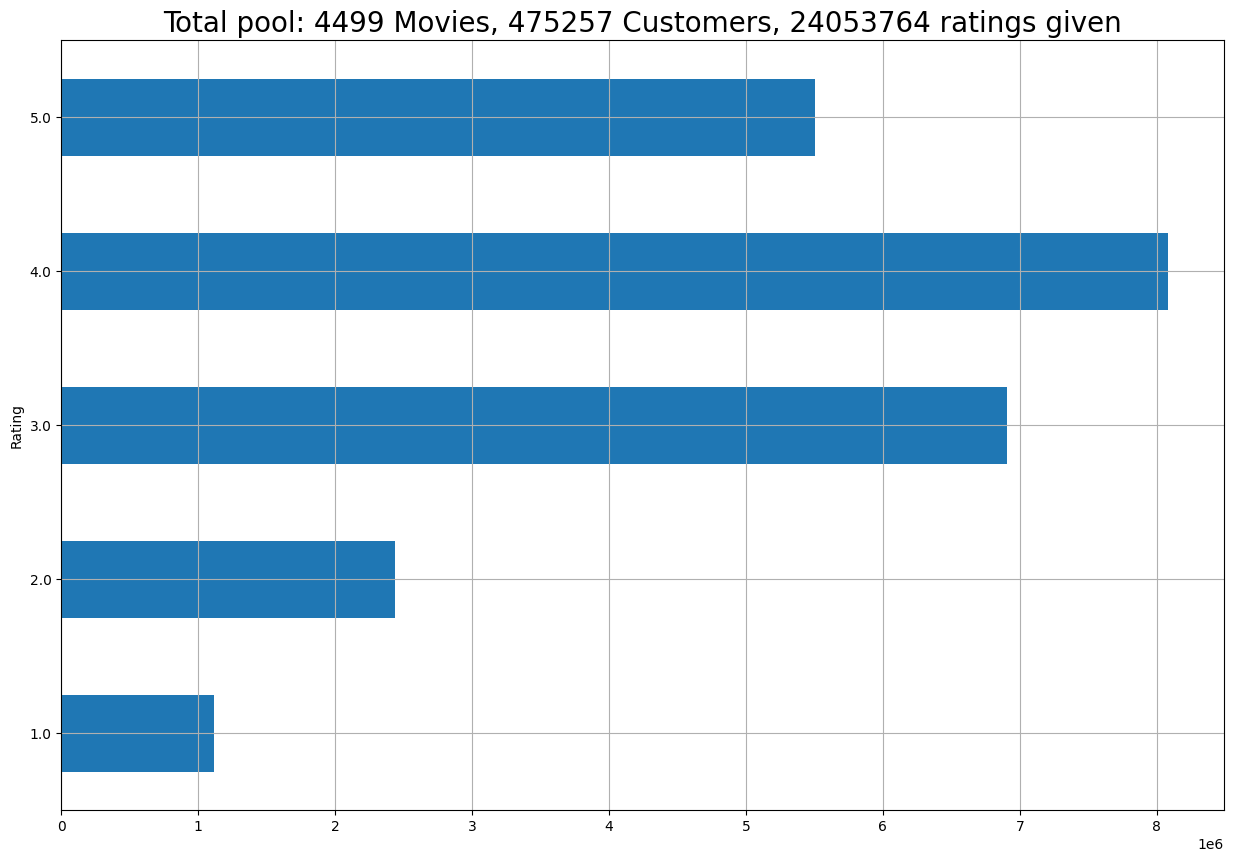

In [19]:
ax=stars.plot(kind='barh', legend=False, figsize=(15,10))
plt.title(f'Total pool: {movie_count} Movies, {customer_count} Customers, {rating_count} ratings given', fontsize=20)
plt.grid(True)

In [20]:
#add another column that will have movie id
#first of all we will be calculating how many null values we are having in the ratings column
df_nan=pd.DataFrame(pd.isnull(netflix_dataset.Rating))

In [21]:
df_nan

,Rating
0,True
1,False
2,False
3,False
4,False
...,...
24058258,False
24058259,False
24058260,False
24058261,False


In [22]:
df_nan=df_nan[df_nan['Rating']==True]
df_nan.shape

(4499, 1)

In [24]:
df_nan.head()

,Rating
0,True
548,True
694,True
2707,True
2850,True


In [25]:
#now we will reset the index as the column
df_nan=df_nan.reset_index()
df_nan.head()

,index,Rating
0,0,True
1,548,True
2,694,True
3,2707,True
4,2850,True


In [27]:
df_nan['index'][1:]
df_nan['index'][:-1]

0              0
1            548
2            694
3           2707
4           2850
          ...   
4493    24046583
4494    24046714
4495    24047329
4496    24056849
4497    24057564
Name: index, Length: 4498, dtype: int64

In [28]:
#working
x=zip(df_nan['index'][1:], df_nan['index'][:-1])

In [29]:
tuple(x)

((548, 0),
 (694, 548),
 (2707, 694),
 (2850, 2707),
 (3991, 2850),
 (5011, 3991),
 (5105, 5011),
 (20016, 5105),
 (20112, 20016),
 (20362, 20112),
 (20561, 20362),
 (21108, 20561),
 (21234, 21108),
 (21353, 21234),
 (21644, 21353),
 (24344, 21644),
 (31453, 24344),
 (42176, 31453),
 (42716, 42176),
 (42833, 42716),
 (43052, 42833),
 (43256, 43052),
 (43872, 43256),
 (45206, 43872),
 (46414, 45206),
 (52276, 46414),
 (52550, 52276),
 (92303, 52550),
 (92827, 92303),
 (211241, 92827),
 (211463, 211241),
 (213318, 211463),
 (220209, 213318),
 (220318, 220209),
 (221158, 220318),
 (222098, 221158),
 (222380, 222098),
 (223183, 222380),
 (223936, 223183),
 (224428, 223936),
 (224522, 224428),
 (224651, 224522),
 (224757, 224651),
 (233259, 224757),
 (235879, 233259),
 (242438, 235879),
 (244789, 242438),
 (248381, 244789),
 (248613, 248381),
 (248942, 248613),
 (249033, 248942),
 (254181, 249033),
 (254296, 254181),
 (254456, 254296),
 (256863, 254456),
 (258697, 256863),
 (262260, 258697)

**HERE WE ARE REMOVING THE NAN VALUE AND ADDING A NEW ARRAY WHICH WE WILL BE CONVERT INTO A COLUMN AS MOVIE ID SO THAT OUR DATA IS WILL BE READY FOR FURTHER PROCESS.
SO WE ARE CREATING A LIST WHERE WE CAN ADD MOVIE ID FOR EACH MOVIES. BY SEEING THE NAN VALUE WE KNOW THAT WE HAVE 4499 MOVIES PRESENT IN OUR DATASET.**

In [26]:
#now we will create a numpy array that will contain 1 from values 0 to 547, 2 from 548 to 693 and so on
movie_np=[]
movie_id=1
for i, j in zip(df_nan['index'][1:], df_nan['index'][:-1]):
    temp=np.full((1, i-j-1), movie_id) #548-0-1 == 547
    movie_np=np.append(movie_np, temp)
    movie_id+=1

#movie_id -> 4499

#account for last record and corresponding length
#numpy approach
last_record=np.full((1, len(netflix_dataset)-df_nan.iloc[-1,0]-1), movie_id)#movie id will be 4499
movie_np=np.append(movie_np, last_record)
print(f'Movie numpy: {movie_np}')
print(f'Length: {len(movie_np)}')

Movie numpy: [1.000e+00 1.000e+00 1.000e+00 ... 4.499e+03 4.499e+03 4.499e+03]
Length: 24053764


In [30]:
netflix_dataset=netflix_dataset[pd.notnull(netflix_dataset['Rating'])]
netflix_dataset['Movie_Id']=movie_np.astype(int)
netflix_dataset['Cust_Id']=netflix_dataset['Cust_Id'].astype(int)
print("Now the dataset will look like: ")
netflix_dataset.head()

<ipython-input-30-cdbbe0cd23c4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_dataset['Movie_Id']=movie_np.astype(int)


Now the dataset will look like: 


<ipython-input-30-cdbbe0cd23c4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_dataset['Cust_Id']=netflix_dataset['Cust_Id'].astype(int)


,Cust_Id,Rating,Movie_Id
1,1488844,3.0,1
2,822109,5.0,1
3,885013,4.0,1
4,30878,4.0,1
5,823519,3.0,1


In [31]:
#now we will remove all the users that have rated less movies and 
#also all those movies that has been rated less in numbers
f=['count','mean']

In [32]:
dataset_movie_summary=netflix_dataset.groupby('Movie_Id').agg(f)

In [33]:
dataset_movie_summary

Cust_Id               Rating          
           count          mean  count      mean
Movie_Id                                       
1            547  1.249876e+06    547  3.749543
2            145  1.341926e+06    145  3.558621
3           2012  1.324290e+06   2012  3.641153
4            142  1.402854e+06    142  2.739437
5           1140  1.302384e+06   1140  3.919298
...          ...           ...    ...       ...
4495         614  1.321093e+06    614  3.478827
4496        9519  1.332006e+06   9519  3.763000
4497         714  1.330543e+06    714  2.715686
4498         269  1.262035e+06    269  2.464684
4499         428  1.270551e+06    428  2.614486

[4499 rows x 4 columns]

In [34]:
dataset_movie_summary=netflix_dataset.groupby('Movie_Id')['Rating'].agg(f)

In [35]:
dataset_movie_summary

,count,mean
Movie_Id,,
1,547,3.749543
2,145,3.558621
3,2012,3.641153
4,142,2.739437
5,1140,3.919298
...,...,...
4495,614,3.478827
4496,9519,3.763000
4497,714,2.715686


In [36]:
#now we will store all the movie_id indexes in a variable dataset_movie_summary.index and convert the datatype to int
dataset_movie_summary.index=dataset_movie_summary.index.map(int)

In [37]:
dataset_movie_summary

,count,mean
Movie_Id,,
1,547,3.749543
2,145,3.558621
3,2012,3.641153
4,142,2.739437
5,1140,3.919298
...,...,...
4495,614,3.478827
4496,9519,3.763000
4497,714,2.715686


In [38]:
#now we will create a benchmark 
movie_benchmark=round(dataset_movie_summary['count'].quantile(0.7),0)
movie_benchmark

1799.0

In [39]:
dataset_movie_summary['count']

Movie_Id
1        547
2        145
3       2012
4        142
5       1140
        ... 
4495     614
4496    9519
4497     714
4498     269
4499     428
Name: count, Length: 4499, dtype: int64

In [40]:
drop_movie_list=dataset_movie_summary[dataset_movie_summary['count']<movie_benchmark].index
drop_movie_list

Int64Index([   1,    2,    4,    5,    6,    7,    9,   10,   11,   12,
            ...
            4484, 4486, 4487, 4489, 4491, 4494, 4495, 4497, 4498, 4499],
           dtype='int64', name='Movie_Id', length=3149)

In [41]:
#now we will remove all the users that are in-active
dataset_cust_summary=netflix_dataset.groupby('Cust_Id')['Rating'].agg(f)
dataset_cust_summary

,count,mean
Cust_Id,,
6,153,3.333333
7,195,4.066667
8,21,4.000000
10,49,3.346939
25,4,3.500000
...,...,...
2649404,12,4.083333
2649409,10,4.000000
2649421,3,5.000000


In [42]:
dataset_cust_summary.index=dataset_cust_summary.index.map(int)

In [43]:
cust_benchmark=round(dataset_cust_summary['count'].quantile(0.7),0)
cust_benchmark

52.0

In [44]:
drop_cust_list=dataset_cust_summary[dataset_cust_summary['count']<cust_benchmark].index
drop_cust_list

Int64Index([      8,      10,      25,      33,      42,      59,      83,
                 87,      94,     116,
            ...
            2649343, 2649351, 2649375, 2649376, 2649379, 2649384, 2649401,
            2649404, 2649409, 2649421],
           dtype='int64', name='Cust_Id', length=327300)

In [45]:
#we will remove all the customers and movies that are below the benchmark 
print('The original dataframe has: ', netflix_dataset.shape, 'shape')

The original dataframe has:  (24053764, 3) shape


In [46]:
netflix_dataset=netflix_dataset[~netflix_dataset['Movie_Id'].isin(drop_movie_list)]
netflix_dataset=netflix_dataset[~netflix_dataset['Cust_Id'].isin(drop_cust_list)]
print('After the triming, the shape is: {}'.format(netflix_dataset.shape))

After the triming, the shape is: (17337458, 3)


In [47]:
#now we will prepare the dataset for SVD and it takes the matrix as the input
# so for input, we will convert the dataset into sparse matrix
#4499 movies
df_p = pd.pivot_table(netflix_dataset, values='Rating', index='Cust_Id', columns='Movie_Id')
print(df_p.shape)

(143458, 1350)


In [48]:
df_p.head()

Movie_Id,3,8,16,17,18,26,28,30,32,33,...,4472,4474,4478,4479,4485,4488,4490,4492,4493,4496
Cust_Id,,,,,,,,,,,,,,,,,,,,,
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,...,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,5.0,NaN,NaN,NaN,NaN,4.0,5.0,NaN,NaN,...,3.0,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN
79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,...,4.0,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN
97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
134,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
import pandas as pd

In [50]:
df_title = pd.read_csv(r"/content/movie_titles _1_.csv",  encoding='ISO-8859-1', header=None, usecols=[0,1,2], names=['Movie_Id','Year','Name' ])

df_title.set_index('Movie_Id', inplace=True)

In [51]:
df_title.head(10)

,Year,Name
Movie_Id,,
1,2003.0,Dinosaur Planet
2,2004.0,Isle of Man TT 2004 Review
3,1997.0,Character
4,1994.0,Paula Abdul's Get Up & Dance
5,2004.0,The Rise and Fall of ECW
6,1997.0,Sick
7,1992.0,8 Man
8,2004.0,What the #$*! Do We Know!?
9,1991.0,Class of Nuke 'Em High 2


In [52]:
#model building
!pip install scikit-surprise
import math
import re
from scipy.sparse import csr_matrix
import seaborn as sns
from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 10.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3095434 sha256=8bb5109f78a9c1e74bd051551e0ff011657fb02e7ca56ae7cc00cc1ff3a989fc
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


In [53]:
#help us to read the dataset for svd algo
reader=Reader()

In [54]:
#we only work with top 100K rows for quick runtime
data=Dataset.load_from_df(netflix_dataset[['Cust_Id','Movie_Id','Rating']][:100000], reader)

In [55]:
svd=SVD()
cross_validate(svd, data, measures=['RMSE','MAE'], cv=3)
#for 1st fold- 1,2,3,4,5

{'test_rmse': array([1.00300991, 0.99709503, 0.99189006]),
 'test_mae': array([0.80110944, 0.79804974, 0.79836257]),
 'fit_time': (2.62766170501709, 1.4464197158813477, 1.4779589176177979),
 'test_time': (0.2255384922027588, 0.389087438583374, 0.23339200019836426)}

In [56]:
netflix_dataset.head()

,Cust_Id,Rating,Movie_Id
696,712664,5.0,3
697,1331154,4.0,3
698,2632461,3.0,3
699,44937,5.0,3
700,656399,4.0,3


In [57]:
#so first we take user 712664 and we try to recommend some movies based on the past data
#He rated so many movies with 5 *
dataset_712664=netflix_dataset[(netflix_dataset['Cust_Id'] ==712664)& (netflix_dataset['Rating']==5)]
dataset_712664=dataset_712664.set_index('Movie_Id')
dataset_712664=dataset_712664.join(df_title)['Name']
dataset_712664

Movie_Id
3                       Character
79                    The Killing
175                Reservoir Dogs
199               The Deer Hunter
241            North by Northwest
                  ...            
3887    Aguirre: The Wrath of God
4109              American Psycho
4266    The Passion of the Christ
4384             Dawn of the Dead
4392             Army of Darkness
Name: Name, Length: 84, dtype: object

In [58]:
#now we will build the recommendation algorithm
#first we will make a shallow copy of the movie_titles.csv file so that we can change 
#the values in the copied dataset, not in the actual dataset

user_712664=df_title.copy()
user_712664

,Year,Name
Movie_Id,,
1,2003.0,Dinosaur Planet
2,2004.0,Isle of Man TT 2004 Review
3,1997.0,Character
4,1994.0,Paula Abdul's Get Up & Dance
5,2004.0,The Rise and Fall of ECW
...,...,...
17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17767,2004.0,Fidel Castro: American Experience
17768,2000.0,Epoch


In [59]:
user_712664=user_712664.reset_index()
user_712664

,Movie_Id,Year,Name
0,1,2003.0,Dinosaur Planet
1,2,2004.0,Isle of Man TT 2004 Review
2,3,1997.0,Character
3,4,1994.0,Paula Abdul's Get Up & Dance
4,5,2004.0,The Rise and Fall of ECW
...,...,...,...
17764,17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17765,17767,2004.0,Fidel Castro: American Experience
17766,17768,2000.0,Epoch
17767,17769,2003.0,The Company


In [60]:
user_712664=user_712664[~user_712664['Movie_Id'].isin(drop_movie_list)]
user_712664

,Movie_Id,Year,Name
2,3,1997.0,Character
7,8,2004.0,What the #$*! Do We Know!?
15,16,1996.0,Screamers
16,17,2005.0,7 Seconds
17,18,1994.0,Immortal Beloved
...,...,...,...
17764,17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17765,17767,2004.0,Fidel Castro: American Experience
17766,17768,2000.0,Epoch
17767,17769,2003.0,The Company


In [61]:
import math
from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate#k-fold 

In [62]:
user_712664['Estimate_Score']=user_712664['Movie_Id'].apply(lambda x: svd.predict(712664, x).est)
user_712664=user_712664.drop('Movie_Id', axis=1)

<ipython-input-62-42d8450a9196>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_712664['Estimate_Score']=user_712664['Movie_Id'].apply(lambda x: svd.predict(712664, x).est)


In [63]:
user_712664=user_712664.sort_values('Estimate_Score')
print(user_712664.head(10))

         Year                        Name  Estimate_Score
25     2004.0             Never Die Alone        3.042187
15     1996.0                   Screamers        3.263670
16     2005.0                   7 Seconds        3.275404
7      2004.0  What the #$*! Do We Know!?        3.625340
17     1994.0            Immortal Beloved        3.695682
10458  1988.0         Red Dwarf: Series 1        3.714557
12899  1998.0                    Star Kid        3.714557
12898  2001.0              Reba: Season 1        3.714557
12897  1976.0                   Pinocchio        3.714557
12896  1989.0        Fright Night Part II        3.714557


In [64]:
user_712664=user_712664.sort_values('Estimate_Score', ascending=False)
print(user_712664.head(10))

      Year                            Name  Estimate_Score
2   1997.0                       Character        4.418166
27  2002.0                 Lilo and Stitch        4.178490
29  2003.0          Something's Gotta Give        3.951077
76  1995.0                           Congo        3.714557
43  1996.0                  Spitfire Grill        3.714557
44  1999.0                 The Love Letter        3.714557
45  1964.0  Rudolph the Red-Nosed Reindeer        3.714557
46  1952.0       The Bad and the Beautiful        3.714557
47  2001.0                  Justice League        3.714557
51  2002.0         The Weather Underground        3.714557


# ***BY SAMRAT KUNDU***